### Capstone Project - Chicago Neighborhoods

#### Data Cleaning / Preprocessing

In [2]:
import pandas as pd 
import numpy as np
import requests

In [3]:
url = 'https://raw.githubusercontent.com/aljohnsonex/Coursera_Capstone/master/Chicago%20Housing.csv'

df = pd.read_csv(url)

df.head(10)

Neighborhood  Average Rent  Latitude  Longitude
0  Near South Side          2803   41.8608   -87.6257
1  Near North Side          2623   41.9039   -87.6315
2            Loop           2470   41.8786   -87.6251
3   Near West Side          2386   41.8668   -87.6664
4        West Town          2122   41.8936   -87.6722
5     Lincoln Park          2016   41.9255   -87.6488
6     North Center          1925   41.9467   -87.6883
7        Hyde Park          1752   41.7948   -87.5917
8         Avondale          1730   41.9415   -87.7025
9        Lake View          1703   41.9398   -87.6589

In [9]:
df.columns = ['Neighborhood', 'Average','Latitude', 'Longitude']
df['Neighborhood']= df['Neighborhood'].astype("str") 
df.head()

Neighborhood  Average  Latitude  Longitude
0  Near South Side     2803   41.8608   -87.6257
1  Near North Side     2623   41.9039   -87.6315
2            Loop      2470   41.8786   -87.6251
3   Near West Side     2386   41.8668   -87.6664
4        West Town     2122   41.8936   -87.6722

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [13]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.7.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

##### Obtain Coordinates for Chicago

In [15]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="TP_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


##### Create a map of Chicago with Neighborhoods

In [16]:
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_chicago)  
map_chicago

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


##### Use the Foursquare API to explore venues within each Neighborhood

In [17]:
CLIENT_ID = 'S0DQAKH2YXYQSTQVHTPLKCV0EOF4EFPOCH0BS5XWKGKPYANS' 
CLIENT_SECRET = '21AYHRWY3LZDF1VEOMGKC450IFDKFJW5TPQ1GTCHDV3G5M4Q' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S0DQAKH2YXYQSTQVHTPLKCV0EOF4EFPOCH0BS5XWKGKPYANS
CLIENT_SECRET:21AYHRWY3LZDF1VEOMGKC450IFDKFJW5TPQ1GTCHDV3G5M4Q


##### Create a function to get the venues by Neighborhood

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        LIMIT = 100
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
chicago_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Near South Side
Near North Side
Loop 
Near West Side
West Town
Lincoln Park
North Center
Hyde Park
Avondale
Lake View
Jefferson Park
Logan Square
Lower West Side
Mckinley Park
North Park
Lincoln Square
Edgewater
Albany Park
West Ridge
Uptown
Grand Boulevard
Kenwood
Hermosa
Rogers Park
O'Hare
South Lawndale
Humboldt Park
Irving Park
West Pullman
West Garfield Park
Douglas
South Deering
Bridgeport
Englewood
Woodlawn
Washington Park
West Englewood
East Garfield Park
North Lawndale 
Roseland
South Chicago
Austin
Auburn Gresham
Portage Park
South Shore
Grand Crossing
Avalon Park
Washington Heights
Belmont Cragin
Chicago Lawn
Chatham
Calumet Heights


In [20]:
print(chicago_venues.shape)
chicago_venues.head()

(1324, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Near South Side                41.8608                -87.6257   
1  Near South Side                41.8608                -87.6257   
2  Near South Side                41.8608                -87.6257   
3  Near South Side                41.8608                -87.6257   
4  Near South Side                41.8608                -87.6257   

                Venue  Venue Latitude  Venue Longitude  \
0              Acadia       41.859030       -87.625409   
1       Solo Eye Care       41.862725       -87.624072   
2      Tapas Valencia       41.861087       -87.627309   
3  Fred Anderson Park       41.859403       -87.625132   
4            M Lounge       41.861327       -87.625901   

            Venue Category  
0  New American Restaurant  
1             Optical Shop  
2         Tapas Restaurant  
3                     Park  
4                   Lounge

##### Group by Neighborhood

In [21]:
chicago_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                               
Albany Park                            29                      29     29   
Auburn Gresham                          4                       4      4   
Austin                                  9                       9      9   
Avalon Park                            12                      12     12   
Avondale                               35                      35     35   
Belmont Cragin                         15                      15     15   
Bridgeport                             54                      54     54   
Calumet Heights                         2                       2      2   
Chatham                                11                      11     11   
Chicago Lawn                            6                       6      6   
Douglas                                26                      26     26   
East Garfield Park                      6                       6      6   
Edgewater                              49                      49     49   
Englewood                               5                       5      5   
Grand Boulevard                        19                      19     19   
Grand Crossing                         10                      10     10   
Hermosa                                18                      18     18   
Humboldt Park                           4                       4      4   
Hyde Park                              42                      42     42   
Irving Park                            20                      20     20   
Jefferson Park                         10                      10     10   
Kenwood                                20                      20     20   
Lake View                              26                      26     26   
Lincoln Park                           96                      96     96   
Lincoln Square                         86                      86     86   
Logan Square                           21                      21     21   
Loop                                   89                      89     89   
Lower West Side                        14                      14     14   
Mckinley Park                          17                      17     17   
Near North Side                        71                      71     71   
Near South Side                        35                      35     35   
Near West Side                         52                      52     52   
North Center                           48                      48     48   
North Lawndale                          4                       4      4   
North Park                              1                       1      1   
O'Hare                                 48                      48     48   
Portage Park                           28                      28     28   
Rogers Park                            29                      29     29   
Roseland                                4                       4      4   
South Chicago                           5                       5      5   
South Lawndale                         27                      27     27   
South Shore                             4                       4      4   
Uptown                                 51                      51     51   
Washington Heights                     16                      16     16   
Washington Park                        10                      10     10   
West Englewood                         14                      14     14   
West Garfield Park                     16                      16     16   
West Pullman                            8                       8      8   
West Ridge                             31                      31     31   
West Town                              55                      55     55   
Woodlawn                               12                      12   

In [22]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 232 uniques categories.


##### Graph the distribution of venues

In [23]:
summary = chicago_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary

Neighborhood  Count
0           North Park      1
1      Calumet Heights      2
2       Auburn Gresham      4
3             Roseland      4
4        Humboldt Park      4
5      North Lawndale       4
6          South Shore      4
7        South Chicago      5
8            Englewood      5
9   East Garfield Park      6
10        Chicago Lawn      6
11        West Pullman      8
12              Austin      9
13     Washington Park     10
14      Grand Crossing     10
15      Jefferson Park     10
16             Chatham     11
17         Avalon Park     12
18            Woodlawn     12
19      West Englewood     14
20     Lower West Side     14
21      Belmont Cragin     15
22  West Garfield Park     16
23  Washington Heights     16
24       Mckinley Park     17
25             Hermosa     18
26     Grand Boulevard     19
27         Irving Park     20
28             Kenwood     20
29        Logan Square     21
30             Douglas     26
31           Lake View     26
32      South Lawndale     27
33        Portage Park     28
34         Rogers Park     29
35         Albany Park     29
36          West Ridge     31
37            Avondale     35
38     Near South Side     35
39           Hyde Park     42
40        North Center     48
41              O'Hare     48
42           Edgewater     49
43              Uptown     51
44      Near West Side     52
45          Bridgeport     54
46           West Town     55
47     Near North Side     71
48      Lincoln Square     86
49               Loop      89
50        Lincoln Park     96

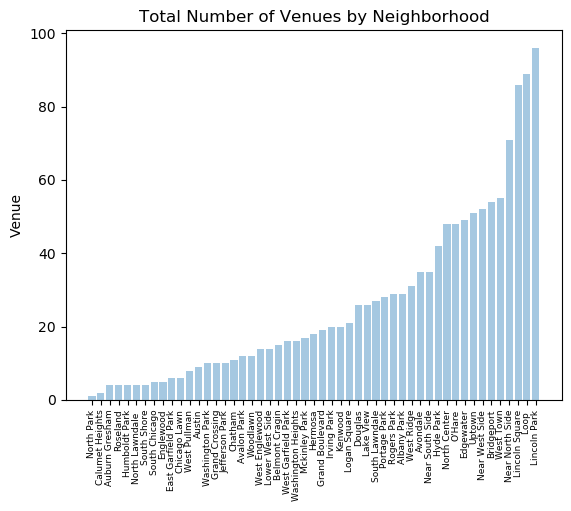

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venues by Neighborhood')
plt.xticks(rotation= 90, fontsize = 6.5)

plt.show()

##### Analyze Top Venues in each District

In [25]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
list_column = chicago_onehot.columns.tolist()
number_column = int(list_column.index('Neighborhood'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
chicago_onehot = chicago_onehot[list_column]

chicago_onehot.head()

Neighborhood  ATM  Accessories Store  African Restaurant  \
0  Near South Side    0                  0                   0   
1  Near South Side    0                  0                   0   
2  Near South Side    0                  0                   0   
3  Near South Side    0                  0                   0   
4  Near South Side    0                  0                   0   

   Airport Lounge  Airport Service  American Restaurant  Antique Shop  Arcade  \
0               0                0                    0             0       0   
1               0                0                    0             0       0   
2               0                0                    0             0       0   
3               0                0                    0             0       0   
4               0                0                    0             0       0   

   Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                 0            0           0                    0   
1                 0            0           0                    0   
2                 0            0           0                    0   
3                 0            0           0                    0   
4                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint  \
0                 0                   0                0          0   
1                 0                   0                0          0   
2                 0                   0                0          0   
3                 0                   0                0          0   
4                 0                   0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  Beach  \
0           0       0     0    0               0                 0      0   
1           0       0     0    0               0                 0      0   
2           0       0     0    0               0                 0      0   
3           0       0     0    0               0                 0      0   
4           0       0     0    0               0                 0      0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                0         0            0           0              0   
1                0         0            0           0              0   
2                0         0            0           0              0   
3                0         0            0           0              0   
4                0         0            0           0              0   

   Bike Shop  Bistro  Board Shop  Bookstore  Boutique  Bowling Alley  \
0          0       0           0          0         0              0   
1          0       0           0          0         0              0   
2          0       0           0          0         0              0   
3          0       0           0          0         0              0   
4          0       0           0          0         0              0   

   Breakfast Spot  Brewery  Burger Joint  Burrito Place  Bus Line  \
0               0        0             0              0         0   
1               0        0             0              0         0   
2               0        0             0              0         0   
3               0        0             0              0         0   
4               0        0             0              0         0   

   Bus Station  Business Service  Butcher  Café  Cajun / Creole Restaurant  \
0            0                 0        0     0                          0   
1            0                 0        0     0                          0   
2            0                 0        0     0                          0   
3            0                 0        0     0                          0   
4            0                 0        0     0                          0   

   Camera Store  Candy Store  Cantonese Restaurant  Caribbean Resta

In [26]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

Neighborhood       ATM  Accessories Store  African Restaurant  \
0          Albany Park  0.000000           0.000000                0.00   
1       Auburn Gresham  0.000000           0.000000                0.00   
2               Austin  0.000000           0.000000                0.00   
3          Avalon Park  0.083333           0.000000                0.00   
4             Avondale  0.000000           0.000000                0.00   
5       Belmont Cragin  0.000000           0.000000                0.00   
6           Bridgeport  0.000000           0.000000                0.00   
7      Calumet Heights  0.000000           0.000000                0.00   
8              Chatham  0.000000           0.000000                0.00   
9         Chicago Lawn  0.000000           0.000000                0.00   
10             Douglas  0.000000           0.000000                0.00   
11  East Garfield Park  0.000000           0.000000                0.00   
12           Edgewater  0.000000           0.000000                0.00   
13           Englewood  0.000000           0.000000                0.00   
14     Grand Boulevard  0.000000           0.000000                0.00   
15      Grand Crossing  0.000000           0.000000                0.00   
16             Hermosa  0.000000           0.000000                0.00   
17       Humboldt Park  0.000000           0.000000                0.00   
18           Hyde Park  0.000000           0.000000                0.00   
19         Irving Park  0.000000           0.000000                0.00   
20      Jefferson Park  0.000000           0.000000                0.00   
21             Kenwood  0.000000           0.000000                0.05   
22           Lake View  0.000000           0.000000                0.00   
23        Lincoln Park  0.000000           0.000000                0.00   
24      Lincoln Square  0.000000           0.000000                0.00   
25        Logan Square  0.000000           0.000000                0.00   
26               Loop   0.000000           0.000000                0.00   
27     Lower West Side  0.000000           0.000000                0.00   
28       Mckinley Park  0.000000           0.000000                0.00   
29     Near North Side  0.000000           0.000000                0.00   
30     Near South Side  0.000000           0.000000                0.00   
31      Near West Side  0.000000           0.000000                0.00   
32        North Center  0.000000           0.000000                0.00   
33     North Lawndale   0.000000           0.000000                0.00   
34          North Park  0.000000           0.000000                0.00   
35              O'Hare  0.000000           0.041667                0.00   
36        Portage Park  0.000000           0.000000                0.00   
37         Rogers Park  0.000000           0.000000                0.00   
38            Roseland  0.000000           0.000000                0.00   
39       South Chicago  0.000000           0.000000                0.00   
40      South Lawndale  0.000000           0.000000                0.00   
41         South Shore  0.000000           0.000000                0.00   
42              Uptown  0.000000           0.000000                0.00   
43  Washington Heights  0.000000           0.000000                0.00   
44     Washington Park  0.000000           0.000000                0.00   
45      West Englewood  0.000000           0.000000                0.00   
46  West Garfield Park  0.000000           0.000000                0.00   
47        West Pullman  0.000000           0.000000                0.00   
48          West Ridge  0.000000           0.000000                0.00   
49           West Town  0.018182           0.000000                0.00   
50            Woodlawn  0.000000           0.000000                0.00   

    Airport Lounge  Airport Service  American Restaurant  Antique Shop  \
0         0.000000           0.0000

##### Let's put these values into a dataframe sorted in descending order

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0     Albany Park     Korean Restaurant           Pizza Place   
1  Auburn Gresham      Basketball Court        Discount Store   
2          Austin        Discount Store        Cosmetics Shop   
3     Avalon Park           Pizza Place          Burger Joint   
4        Avondale           Coffee Shop            Food Truck   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Mexican Restaurant         Hot Dog Joint        Sandwich Place   
1                  Park         Grocery Store           Yoga Studio   
2        Breakfast Spot                  Food                  Café   
3         Grocery Store                 Diner        Sandwich Place   
4    Mexican Restaurant  Fast Food Restaurant   Fried Chicken Joint   

       6th Most Common Venue 7th Most Common Venue      8th Most Common Venue  \
0        Fried Chicken Joint     Mobile Phone Shop       Fast Food Restaurant   
1       Ethiopian Restaurant            Food Truck                 Food Court   
2                  BBQ Joint    Athletics & Sports                Pizza Place   
3  Cajun / Creole Restaurant  Fast Food Restaurant                   Boutique   
4                 Beer Store         Big Box Store  South American Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Seafood Restaurant       Business Service  
1     Food & Drink Shop                   Food  
2    Dim Sum Restaurant         Farmers Market  
3                   ATM       Insurance Office  
4            Shoe Store                Brewery

#### Cluster the Neighborhoods

In [29]:
kclusters = 3

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters= kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0], dtype=int32)

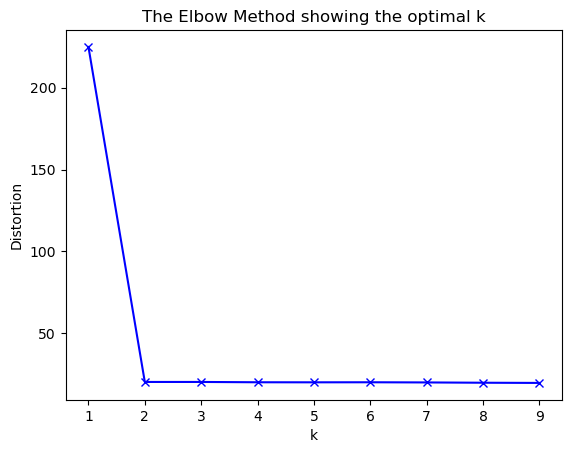

In [30]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(chicago_grouped_clustering)
    kmeanModel.fit(chicago_grouped_clustering)
    distortions.append(sum(np.min(cdist(chicago_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / chicago_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [45]:
df.drop(31, inplace = True)

In [46]:
chicago_merged = df

chicago_merged['Cluster Labels'] = labels

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(districts_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head()

Neighborhood  Average  Latitude  Longitude  Cluster Labels  \
0  Near South Side     2803   41.8608   -87.6257               0   
1  Near North Side     2623   41.9039   -87.6315               0   
2            Loop      2470   41.8786   -87.6251               0   
3   Near West Side     2386   41.8668   -87.6664               0   
4        West Town     2122   41.8936   -87.6722               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Park                   Bar         Grocery Store   
1    Italian Restaurant  Gym / Fitness Center           Coffee Shop   
2        Sandwich Place                 Plaza           Coffee Shop   
3    Italian Restaurant        Sandwich Place       Thai Restaurant   
4    Mexican Restaurant           Pizza Place                   Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Dog Run   Rental Car Location      Sushi Restaurant   
1                   Gym                  Café           Pizza Place   
2   American Restaurant               Theater                   Bar   
3          Liquor Store    Mexican Restaurant        Breakfast Spot   
4               Brewery      Greek Restaurant              Pharmacy   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant            Steakhouse            Donut Shop   
1            Steakhouse                   Pub            Restaurant   
2            Art Museum            Public Art      Sculpture Garden   
3         Women's Store                   Bar     Korean Restaurant   
4                Bakery  Gym / Fitness Center    Italian Restaurant   

      10th Most Common Venue  
0                Candy Store  
1                        Bar  
2                   Boutique  
3  Middle Eastern Restaurant  
4        Japanese Restaurant

In [47]:
count_venue = chicago_merged
count_venue = count_venue.drop(['Neighborhood','Average', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue  Airport Lounge  American Restaurant  Bar  \
0                                   1                    2    1   
1                                   0                    0    1   
2                                   0                    0    0   

1st Most Common Venue  Basketball Court  Boutique  Bus Station  \
0                                     1         1            3   
1                                     0         0            0   
2                                     0         0            0   

1st Most Common Venue  Chinese Restaurant  Coffee Shop  \
0                                       1            1   
1                                       0            1   
2                                       0            0   

1st Most Common Venue  Construction & Landscaping  Cosmetics Shop  \
0                                               1               0   
1                                               0               1   
2                                               0               0   

1st Most Common Venue  Discount Store  Fast Food Restaurant  Food  \
0                                   1                     4     1   
1                                   0                     0     0   
2                                   0                     1     0   

1st Most Common Venue  Gymnastics Gym  Hot Dog Joint  Indian Restaurant  \
0                                   1              1                  1   
1                                   0              0                  0   
2                                   0              0                  0   

1st Most Common Venue  Italian Restaurant  Korean Restaurant  Liquor Store  \
0                                       2                  0             1   
1                                       0                  1             0   
2                                       0                  0             0   

1st Most Common Venue  Lounge  Mexican Restaurant  Park  \
0                           0                   6     1   
1                           1                   1     0   
2                           0                   0     0   

1st Most Common Venue  Performing Arts Venue  Pharmacy  Pizza Place  \
0                                          1         1            3   
1                                          0         1            1   
2                                          0         0            0   

1st Most Common Venue  Sandwich Place  Seafood Restaurant  \
0                                   2                   1   
1                                   0                   0   
2                                   0                   0   

1st Most Common Venue  Southern / Soul Food Restaurant  Sushi Restaurant  \
0                                                    1                 1   
1                                                    0                 0   
2                                                    0                 0   

1st Most Common Venue  Train Station  
0                                  1  
1                                  0  
2                                  0

Text(0, 0.5, 'Clusters')

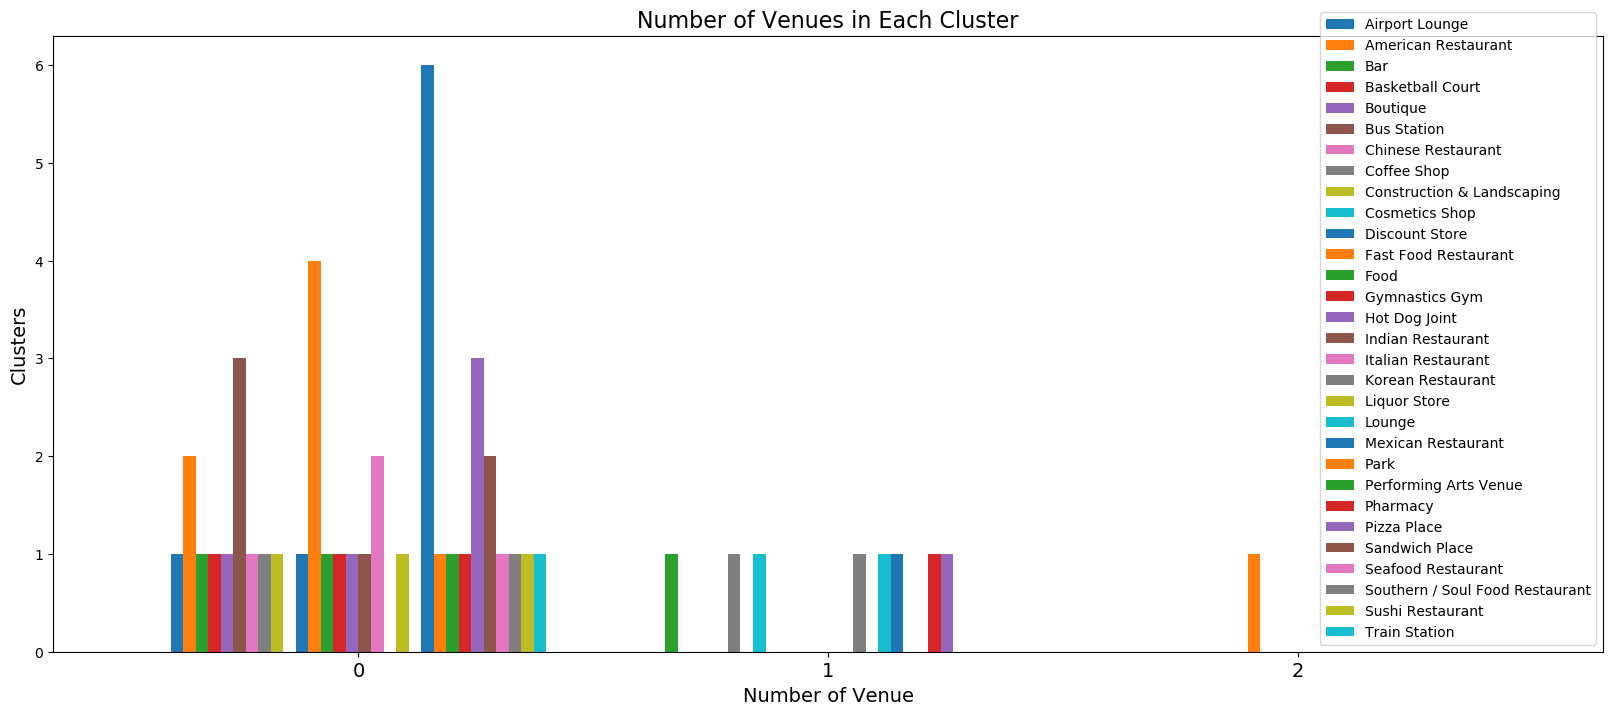

In [48]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 10)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [49]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Mexican Restaurants","Multiple Social Venues","Park"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

Clusters                  Labels
0         0     Mexican Restaurants
1         1  Multiple Social Venues
2         2                    Park

In [53]:
url = 'https://raw.githubusercontent.com/aljohnsonex/Coursera_Capstone/master/Chicago%20Housing.csv'

df1 = pd.read_csv(url)

df1.head(10)

Neighborhood  Average Rent  Latitude  Longitude
0  Near South Side          2803   41.8608   -87.6257
1  Near North Side          2623   41.9039   -87.6315
2            Loop           2470   41.8786   -87.6251
3   Near West Side          2386   41.8668   -87.6664
4        West Town          2122   41.8936   -87.6722
5     Lincoln Park          2016   41.9255   -87.6488
6     North Center          1925   41.9467   -87.6883
7        Hyde Park          1752   41.7948   -87.5917
8         Avondale          1730   41.9415   -87.7025
9        Lake View          1703   41.9398   -87.6589

In [54]:
data_process = df1.sort_values('Average Rent').reset_index(drop=True)
data_process = data_process.drop(['Latitude', 'Longitude'], axis=1)
data_process.head()

Neighborhood  Average Rent
0     Calumet Heights           871
1             Chatham           883
2        Chicago Lawn           894
3      Belmont Cragin           910
4  Washington Heights           951

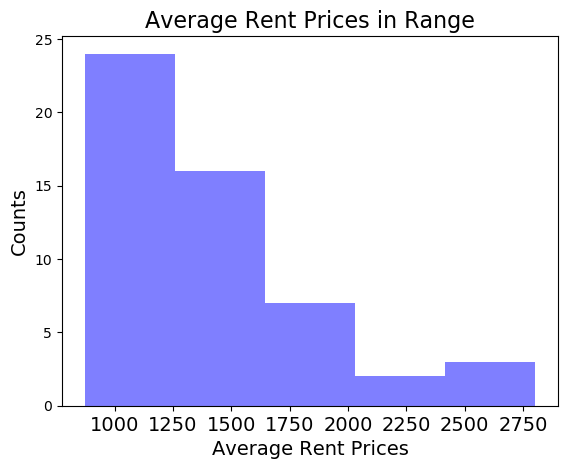

In [55]:
num_bins = 5
n, bins, patches = plt.hist(data_process['Average Rent'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Average Rent Prices in Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Average Rent Prices', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [56]:
level = []
for i in range(0,len(data_process)):
    if (data_process['Average Rent'][i] < 1000):
        level.append("Low Level Rent")
    elif (data_process['Average Rent'][i] >= 1000 and data_process['Average Rent'][i] < 1600):
        level.append("Mid Level Rent")
    else:
        level.append("High Level Rent")   

data_process['Level_labels'] = level
data_process.head()

Neighborhood  Average Rent    Level_labels
0     Calumet Heights           871  Low Level Rent
1             Chatham           883  Low Level Rent
2        Chicago Lawn           894  Low Level Rent
3      Belmont Cragin           910  Low Level Rent
4  Washington Heights           951  Low Level Rent

In [57]:
top3 = chicago_venues.groupby(['Neighborhood','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Neighborhood','Counts'],ascending=False).groupby('Neighborhood').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Neighborhood'])['Join'].apply(", ".join).reset_index()

top3.head()

Neighborhood                                               Join
0     Albany Park  4 Korean Restaurant, 2 Mexican Restaurant, 2 P...
1  Auburn Gresham  1 Basketball Court, 1 Discount Store, 1 Grocer...
2          Austin  2 Discount Store, 1 Athletics & Sports, 1 BBQ ...
3     Avalon Park               2 Burger Joint, 2 Pizza Place, 1 ATM
4        Avondale  2 Coffee Shop, 2 Food Truck, 2 Mexican Restaurant

In [58]:
import numpy as np

result = pd.merge(chicago_merged, 
                    top3[['Neighborhood', 'Join']],
                    left_on = 'Neighborhood',
                    right_on = 'Neighborhood',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['Neighborhood', 'Level_labels']],
                    left_on = 'Neighborhood',
                    right_on = 'Neighborhood',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result.head(3)

Neighborhood  Average  Latitude  Longitude  Cluster Labels  \
0  Near South Side     2803   41.8608   -87.6257               0   
1  Near North Side     2623   41.9039   -87.6315               0   
2            Loop      2470   41.8786   -87.6251               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Park                   Bar         Grocery Store   
1    Italian Restaurant  Gym / Fitness Center           Coffee Shop   
2        Sandwich Place                 Plaza           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Dog Run   Rental Car Location      Sushi Restaurant   
1                   Gym                  Café           Pizza Place   
2   American Restaurant               Theater                   Bar   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant            Steakhouse            Donut Shop   
1            Steakhouse                   Pub            Restaurant   
2            Art Museum            Public Art      Sculpture Garden   

  10th Most Common Venue                                         Join  \
0            Candy Store                     3 Park, 2 Bar, 2 Dog Run   
1                    Bar  5 Italian Restaurant, 4 Café, 4 Coffee Shop   
2               Boutique     5 Sandwich Place, 4 Coffee Shop, 4 Plaza   

                Labels     Level_labels  
0  Mexican Restaurants  High Level Rent  
1  Mexican Restaurants  High Level Rent  
2  Mexican Restaurants  High Level Rent

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Neighborhood'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [33]:
!wget --quiet https://raw.githubusercontent.com/aljohnsonex/Coursera_Capstone/master/Boundaries%20-%20Neighborhoods.geojson
    
#https://geo.nyu.edu/download/file/stanford-nj696zj1674-geojson.json    
print('GeoJSON file downloaded!')

chicago_geo = r'map.geojson'

#San Francisco La, Lo
latitude = 41.5255
longitude = -87.37



GeoJSON file downloaded!


In [68]:
# display San-Francisco
chicago_map5 = folium.Map(location=[latitude, longitude], zoom_start=10)

In [35]:
df.columns

Index(['Neighborhood', 'Average', 'Latitude', 'Longitude'], dtype='object')

In [69]:
chicago_map5.choropleth(
    geo_data=chicago_geo,
    data=df,
    columns=['Neighborhood','Average'],
    key_on='feature.properties.pri_neigh',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rental Price',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Neighborhood'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color= rainbow[cluster_number-1],
        fill=True,
        fill_color= rainbow[cluster_number-1],
        fill_opacity=1).add_to(chicago_map5)
    
#display map
chicago_map5